In [25]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random
from sklearn.metrics import accuracy_score

# Read and Understand Data

In [3]:
csv = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv"
heart_df = pd.read_csv(csv)
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


There does not seem to be any missing data. 

In [5]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


To see the distribution of the data, I looked at the Pairwise Graph for both a linear and a polynomial relationship.

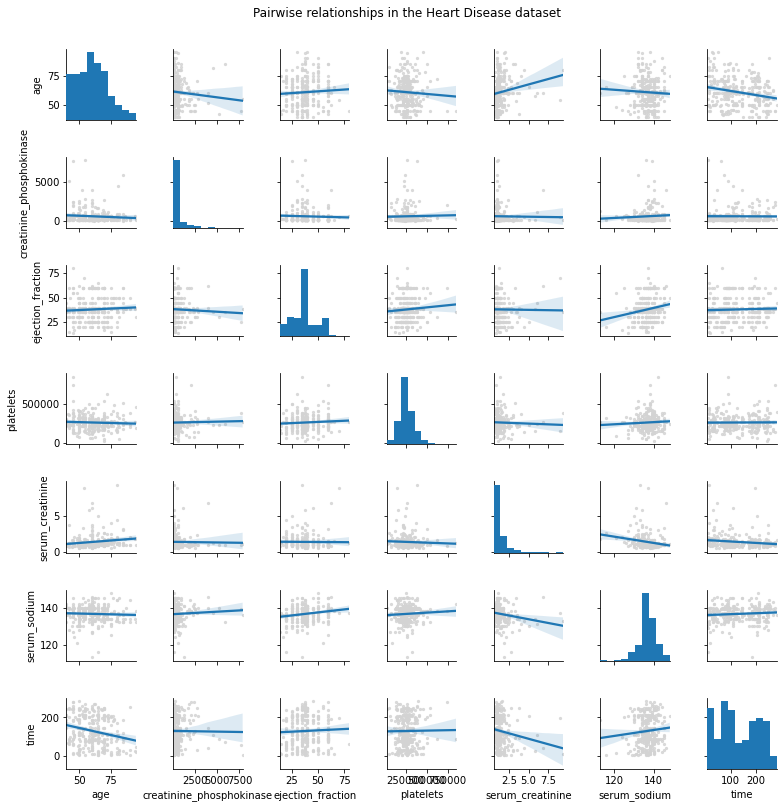

In [6]:
#Pairwise Graph: 
g=sns.pairplot(
    data=heart_df.drop(['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], axis=1),
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}},
     kind="reg",
    height=1.5 
);
g.fig.suptitle(
    "Pairwise relationships in the Heart Disease dataset", y=1.05
);

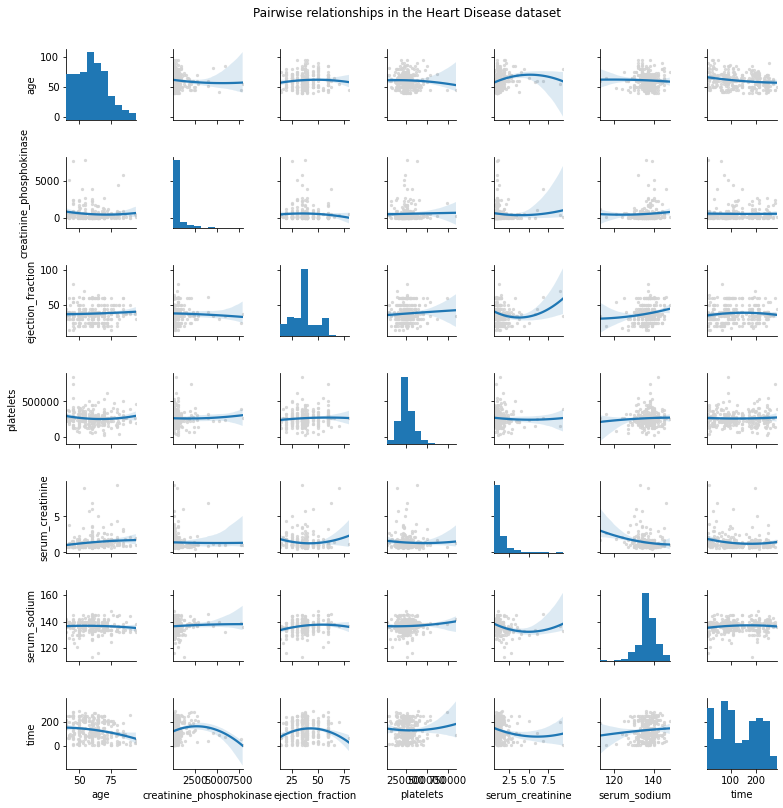

In [7]:
#Pairwise Graph: 
g=sns.pairplot(
    data=heart_df.drop(['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], axis=1),
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order": 2},
    kind="reg", 
    height = 1.5
);
g.fig.suptitle(
    "Pairwise relationships in the Heart Disease dataset", y=1.05
);

The polynomial pairwise graph was not as useful as the linear pairwise graph.

# Do females have a lower percent of blood contraction in hearts than males (because females are typically smaller or is blood contraction proportional to body size) and does this play a role in their survival?


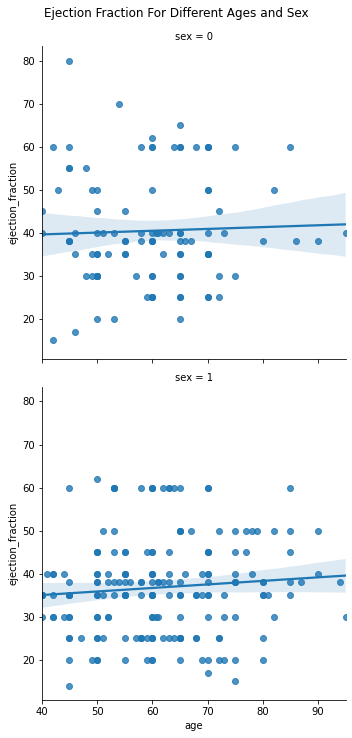

In [8]:
g=sns.lmplot(
    data=heart_df, 
    x="age",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    row="sex",
    palette="Paired"
    ) 
g.fig.suptitle("Ejection Fraction For Different Ages and Sex", y=1.02);

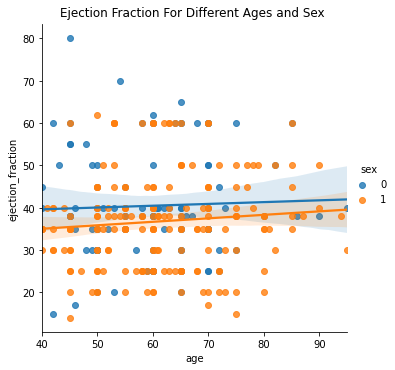

In [9]:
g=sns.lmplot(
    data=heart_df, 
    x="age",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    hue="sex"
    ) 
g.fig.suptitle("Ejection Fraction For Different Ages and Sex", y=1.02);

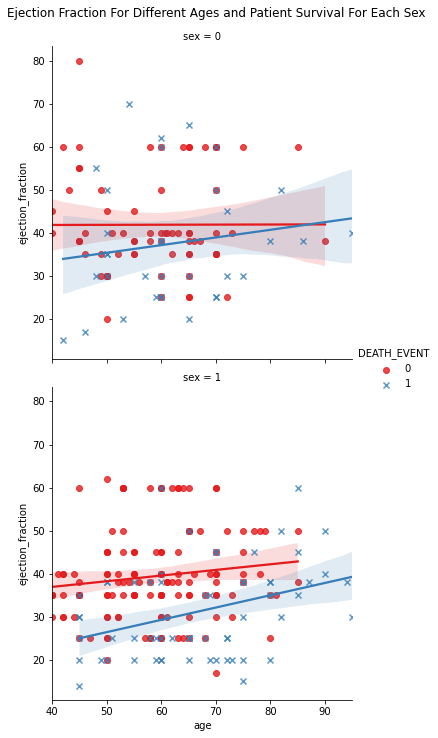

In [10]:
g=sns.lmplot(
    data=heart_df, 
    x="age",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    row="sex",
    palette="Set1", 
    hue="DEATH_EVENT", 
    markers=["o", "x"]
    ) 
g.fig.suptitle("Ejection Fraction For Different Ages and Patient Survival For Each Sex", y=1.02);

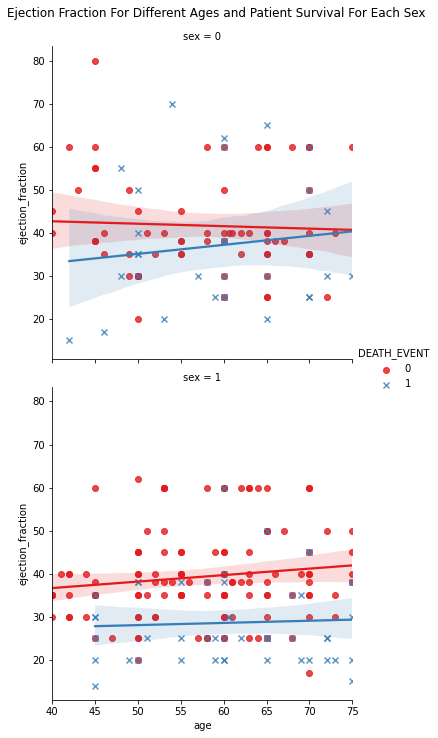

In [11]:
g=sns.lmplot(
    data=heart_df[heart_df.age <= 75], 
    x="age",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    row="sex",
    palette="Set1", 
    hue="DEATH_EVENT", 
    markers=["o", "x"]
    ) 
g.fig.suptitle("Ejection Fraction For Different Ages and Patient Survival For Each Sex", y=1.02);

Sex (0: woman; 1: man)

Unlike how I predicted, on average woman have a higher ejection fraction than men even though they are smaller in size.

Nevertheless, if a patient dies, they had a lower ejection fraction regardless of their sex.

# Is the percent of blood leaving the heart at each contraction related to muscle degradation (which can be measured through the level of creatinine in the blood) different in patients who survived vs. died?

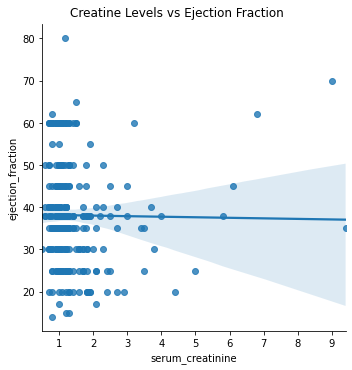

In [12]:
g=sns.lmplot(
    data=heart_df, 
    x="serum_creatinine",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    ) 
g.fig.suptitle("Creatine Levels vs Ejection Fraction", y=1.02);

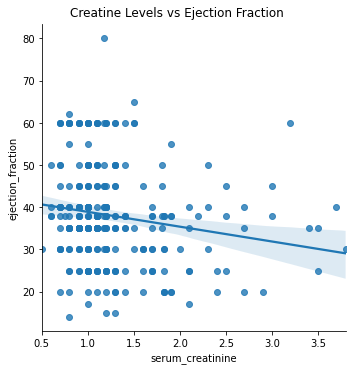

In [13]:
g=sns.lmplot(
    data=heart_df[heart_df.serum_creatinine < 4], 
    x="serum_creatinine",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    ) 
g.fig.suptitle("Creatine Levels vs Ejection Fraction", y=1.02);

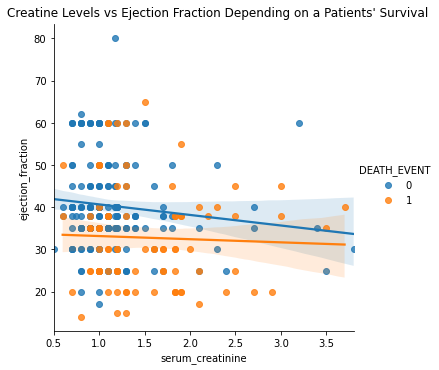

In [14]:
g=sns.lmplot(
    data=heart_df[heart_df.serum_creatinine < 4], 
    x="serum_creatinine",
    y="ejection_fraction",
    aspect=1, # aspect ratio
    hue = 'DEATH_EVENT'
    ) 
g.fig.suptitle("Creatine Levels vs Ejection Fraction Depending on a Patients' Survival", y=1.02);

Less blood gets pumped as more tissues get damaged and patients who experienced death on average have a lower blood pumped than patients who survive.  

#Can the level of creatine in the blood be used to measure creatinine phosphokinase enzyme in the blood?

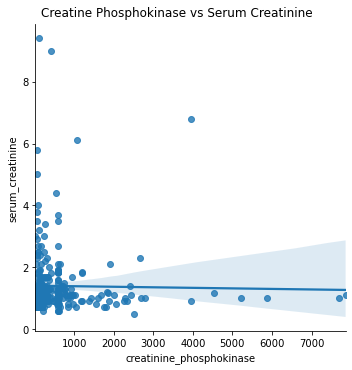

In [15]:
g=sns.lmplot(
    data=heart_df, 
    x="creatinine_phosphokinase",
    y="serum_creatinine",
    aspect=1, # aspect ratio
    ) 
g.fig.suptitle("Creatine Phosphokinase vs Serum Creatinine", y=1.02);

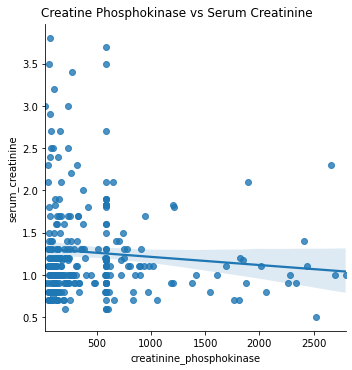

In [16]:
g=sns.lmplot(
    data=heart_df[(heart_df.creatinine_phosphokinase < 3000) & (heart_df.serum_creatinine < 4)], 
    x="creatinine_phosphokinase",
    y="serum_creatinine",
    aspect=1, # aspect ratio
    ) 
g.fig.suptitle("Creatine Phosphokinase vs Serum Creatinine", y=1.02);

C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


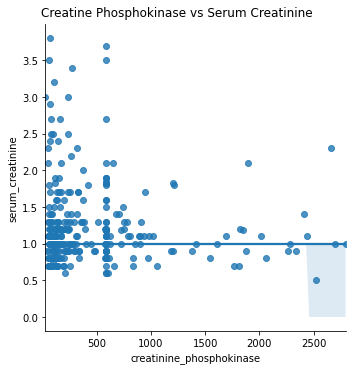

In [17]:
g = sns.lmplot(
    data=heart_df[(heart_df.creatinine_phosphokinase < 3000) & (heart_df.serum_creatinine < 4)], 
    x="creatinine_phosphokinase",
    y="serum_creatinine",
    logistic = True
)
g.fig.suptitle("Creatine Phosphokinase vs Serum Creatinine", y=1.02);

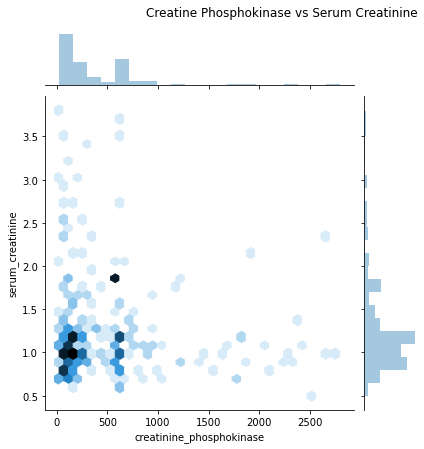

In [18]:
sns.jointplot(
    data=heart_df[(heart_df.creatinine_phosphokinase < 3000) & (heart_df.serum_creatinine < 4)],
    x="creatinine_phosphokinase",
    y="serum_creatinine",
    kind="hex",
    gridsize=30
);
plt.title ("Creatine Phosphokinase vs Serum Creatinine",  loc = "right", pad = 80);

While there looks to be a logistic relationship at first glance between creatinine_phoshokinase and serum_creatinine, there is not a clear relationship between the two, so no,  the level of creatine in the blood cannot be used to measure creatinine phophokinase enzyme in the blood.

# Is there an increase in platelet counts if the patient survives vs. dies? when there some kind of damage in the body? both?


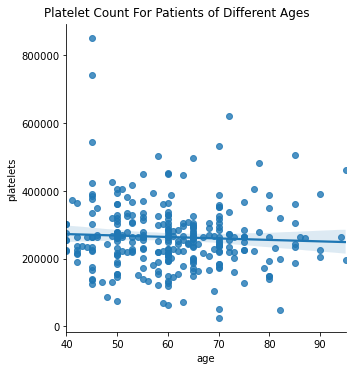

In [32]:
g=sns.lmplot(
    data=heart_df,
    x="age",
    y="platelets"
    ) 
g.fig.suptitle("Platelet Count For Patients of Different Ages", y=1.02);

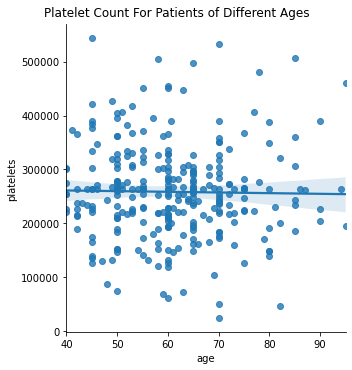

In [33]:
g=sns.lmplot(
    data=heart_df[heart_df.platelets < 600000], 
    x="age",
    y="platelets"
    ) 
g.fig.suptitle("Platelet Count For Patients of Different Ages", y=1.02);

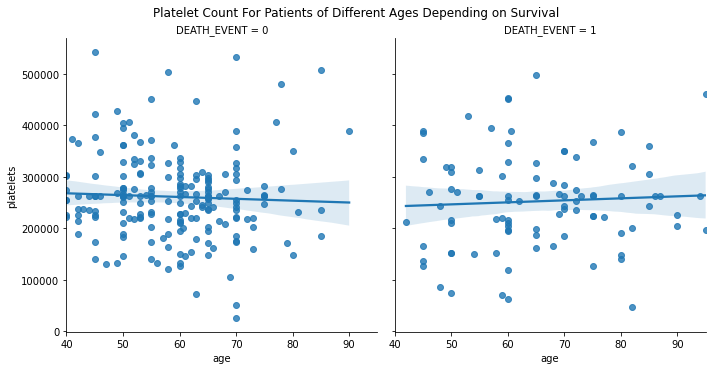

In [34]:
g=sns.lmplot(
    data=heart_df[heart_df.platelets < 600000], 
    x="age",
    y="platelets",
    col  = "DEATH_EVENT"
    ) 
g.fig.suptitle("Platelet Count For Patients of Different Ages Depending on Survival", y=1.02);

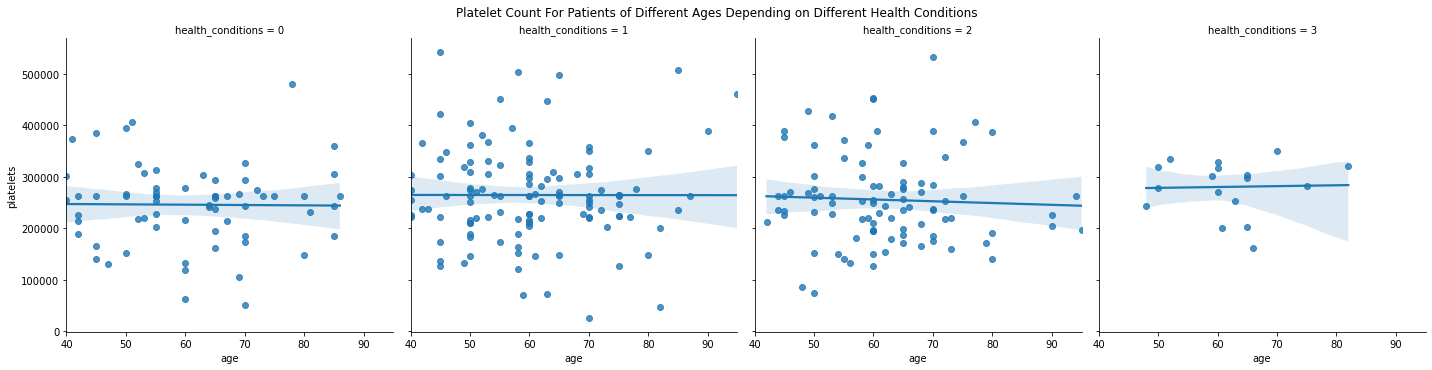

In [35]:
g=sns.lmplot(
    data=heart_df[heart_df.platelets < 600000].sort_values("health_conditions", ascending = False), 
    x="age",
    y="platelets",
    col  = "health_conditions"
    ) 
g.fig.suptitle("Platelet Count For Patients of Different Ages Depending on Different Health Conditions", y=1.02);

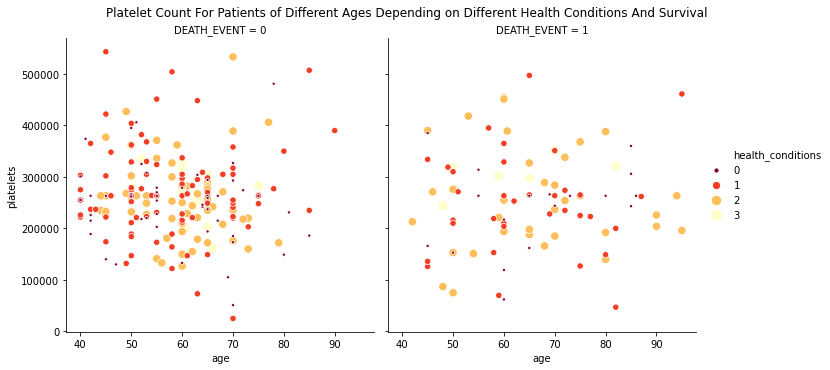

In [36]:
g=sns.relplot(
    data=heart_df[heart_df.platelets < 600000].sort_values("health_conditions", ascending = False), 
    x="age",
    y="platelets",
    col  = "DEATH_EVENT", 
    size = "health_conditions",
    sizes = (10, 100), 
    hue = "health_conditions",
    palette = "YlOrRd_r"
    ) 
g.fig.suptitle("Platelet Count For Patients of Different Ages Depending on Different Health Conditions And Survival", y=1.02);

There is no correlation between platelet count and the patient survival so platelet count looks like on average stays the same. 

#Do patients with higher sodium levels with high blood pressure have a higher chance of survival?


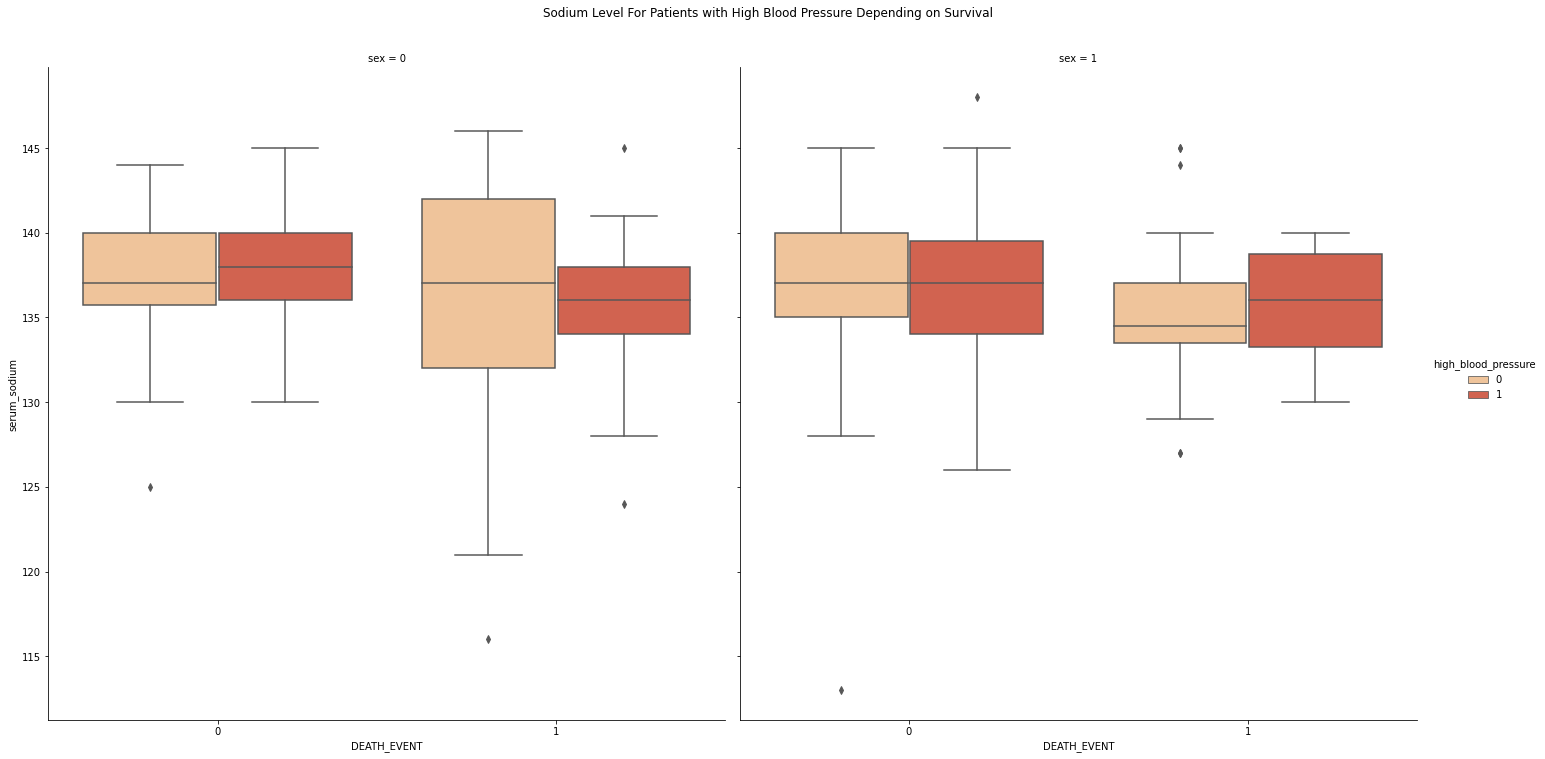

In [37]:
g = sns.catplot(
    data=heart_df, 
    x="DEATH_EVENT",
    y="serum_sodium",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    height=10,
    palette="OrRd",
    hue = "high_blood_pressure", 
    col = "sex", 
    ) 
g.fig.suptitle("Sodium Level For Patients with High Blood Pressure Depending on Survival", y = 1.05);

Majority of the patients have sodiums levels between 130-145 mEq/L which causes there not to be a clear indication that sodium levels and high_blood_pressure leads to death. 

#Training and Testing Sets

In [38]:
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,health_conditions
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,2
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0


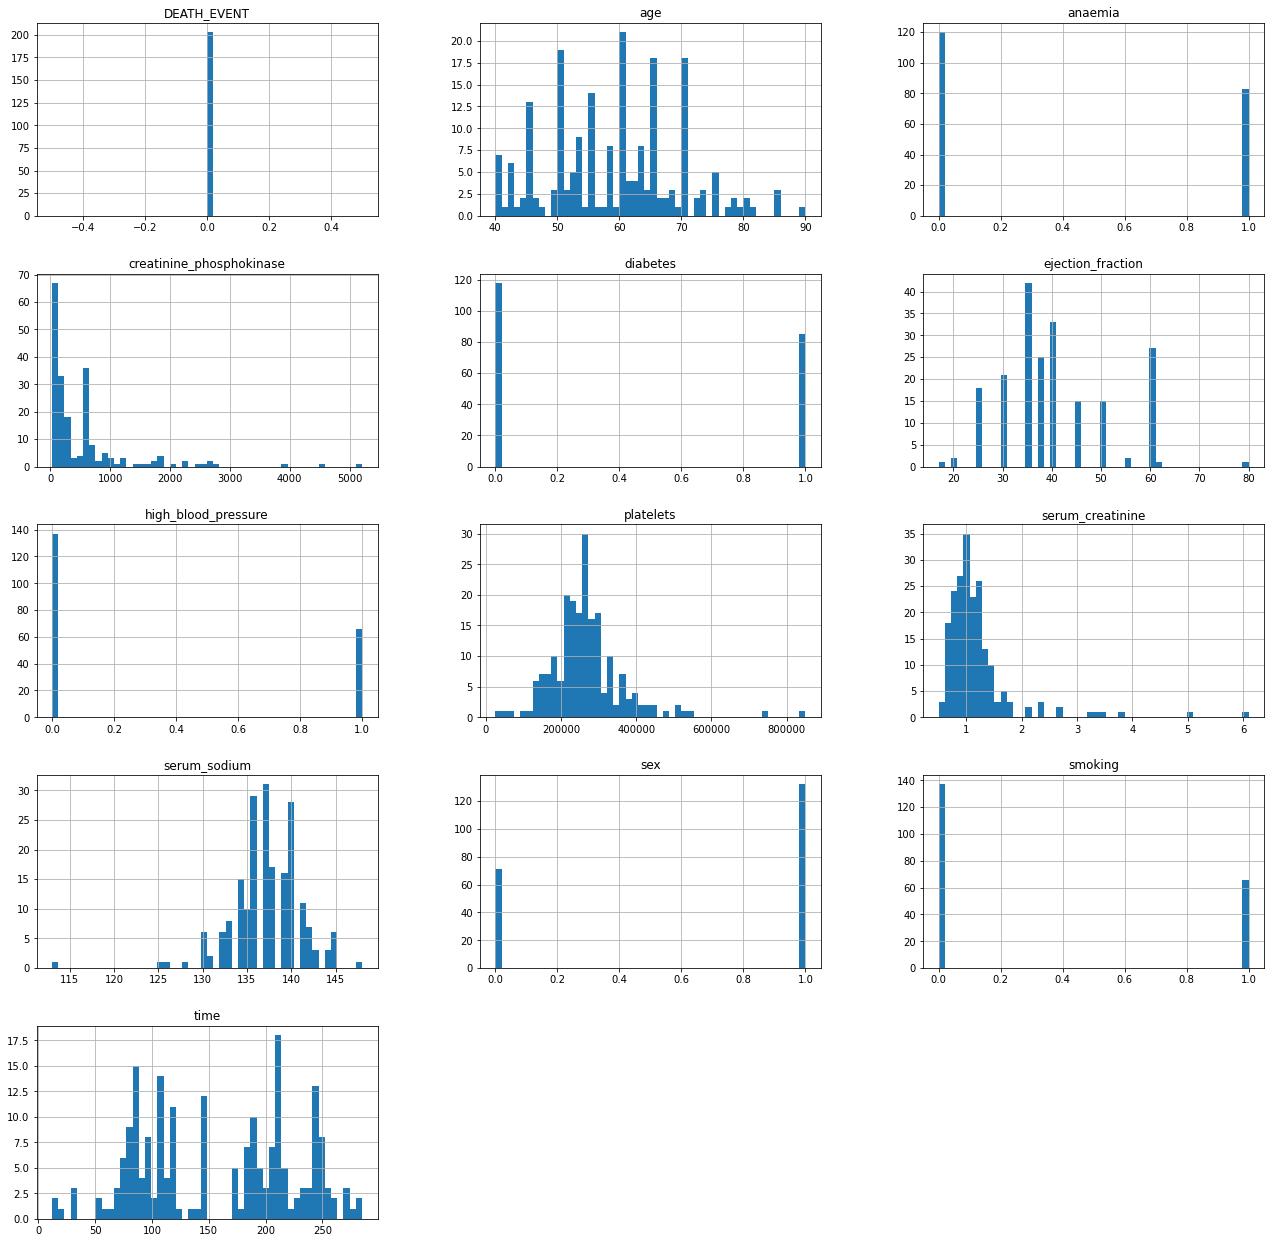

In [39]:
heart_df[heart_df.DEATH_EVENT == 0].hist(bins=50, figsize=(22,22), layout = (5, 3))
plt.show()

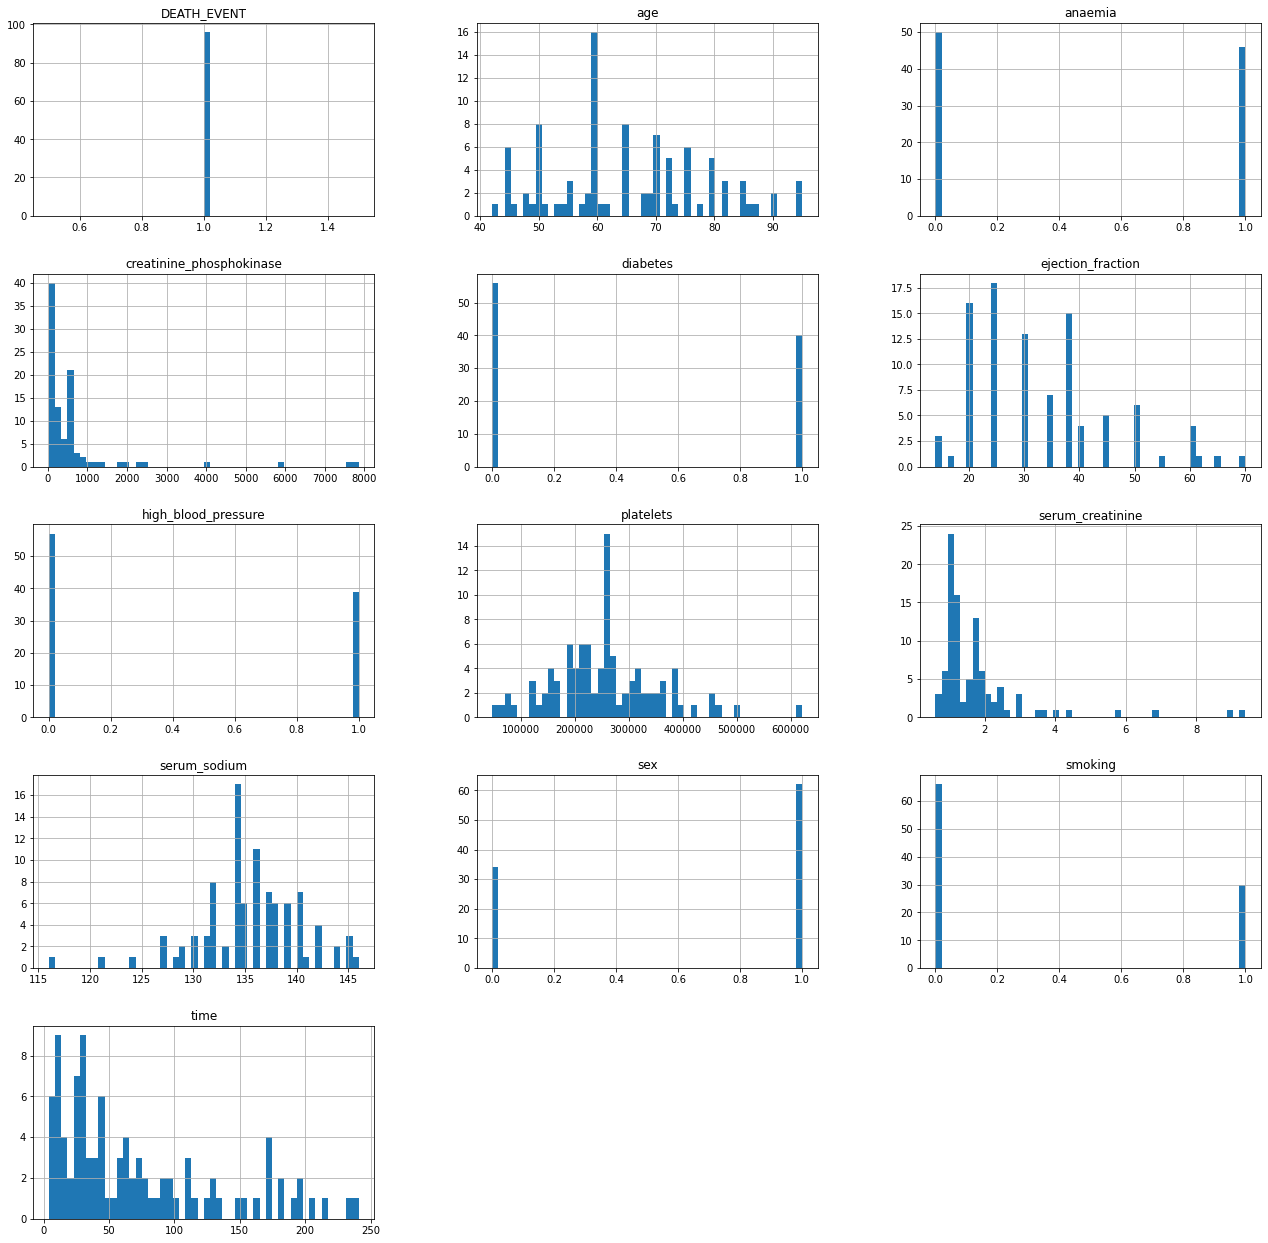

In [40]:
heart_df[heart_df.DEATH_EVENT == 1].hist(bins=50, figsize=(22,22), layout =(5,3))
plt.show()

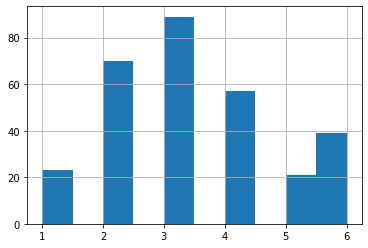

In [41]:
heart_df["ef_cat"] = pd.cut(heart_df["ejection_fraction"],
                       bins=[0, 23, 30, 38, 45, 53, np.inf],
                       labels=[1, 2, 3, 4, 5, 6])
heart_df["ef_cat"].hist();

In [42]:
#Stratified Splitting
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(heart_df, heart_df["ef_cat"]):
    strat_train_set = heart_df.loc[train_index]
    strat_test_set = heart_df.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("ef_cat", axis=1, inplace=True)

In [43]:
heart_df = strat_train_set.drop("DEATH_EVENT", axis=1)
heart_df_labels = strat_train_set["DEATH_EVENT"].copy()

In [44]:
heart_df_num = heart_df.drop(columns = ["anaemia", "high_blood_pressure", "diabetes", "sex", "smoking", "health_conditions"], axis=1)

In [45]:
# This cell block is for the pipeline if the data had missing values in the categorical and numerical but our dataset does not so I commeneted this part out: 

# from sklearn.impute import SimpleImputer 
# heart_df_cat = heart_df[["anaemia", "high_blood_pressure", "diabetes", "sex", "smoking", "health_conditions"]]
# num_pipeline = Pipeline([
#                          ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
#                          ('std_scaler', StandardScaler())
# ])
# num_tr = num_pipeline.fit_transform(heart_df_num)
# cat_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="most_frequent")),
# ])
# df_cat_tr = cat_pipeline.fit_transform(heart_df_cat)
# df_cat_tr
# num_attr = list (heart_df_num)
# cat_attr = list (heart_df_cat)

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attr),
#         ("cat", cat_pipeline, cat_attr)
#     ])
# df_tr = full_pipeline.fit_transform(heart_df)

# df_prepared = pd.DataFrame(
#     df_tr, 
#     columns = heart_df.columns, 
#     index = heart_df.index
# )
# df_prepared

In [46]:
#Number Pipeline
num_pipeline = Pipeline ([
    ('std_scaler', StandardScaler())
])
num_tr = num_pipeline.fit_transform(heart_df_num)

In [47]:
#Full Pipeline
num_attr = list (heart_df_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr)
], remainder='passthrough'
)

In [48]:
df_tr = full_pipeline.fit_transform(heart_df)

In [49]:
df_prepared = pd.DataFrame(
    df_tr, 
    columns = heart_df.columns, 
    index = heart_df.index
)
df_prepared

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,health_conditions
249,-0.607486,-0.433224,0.160652,-0.463032,-0.155467,-1.43105,1.12401,0,1,0,0,0,1
289,2.52548,-0.272183,-0.00775076,1.23482,-0.440337,1.6843,1.67361,1,0,0,0,0,1
46,-0.776835,1.01986,-1.10237,0.0249745,-0.440337,-1.43105,-1.17909,0,0,1,1,0,1
231,0.831986,-0.574444,-0.260355,-0.84937,-0.250424,-0.540949,1.04549,0,0,0,1,1,0
42,0.831986,0.0176901,0.58166,-0.84937,-0.155467,0.571674,-1.24452,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.86151,-0.622757,0.160652,0.106309,-0.535294,1.01672,1.5951,1,0,0,1,0,1
202,0.831986,-0.569489,1.84468,-0.493532,-0.440337,0.349149,0.757607,0,0,1,1,0,1
271,-0.776835,0.0313167,0.160652,-0.483365,-0.440337,-0.540949,1.51658,0,1,0,0,0,1
195,1.42471,-0.171842,0.58166,-0.463032,0.414274,1.90682,0.679092,1,0,0,1,0,1


In [50]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

tree_reg = DecisionTreeClassifier ()
dec_model = tree_reg.fit(df_tr, heart_df_labels)

#Decision Tree Testing
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, df_tr, heart_df_labels, 
                        scoring="accuracy", cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(scores)

Scores: [0.875      0.83333333 0.70833333 0.625      0.79166667 0.70833333
 0.83333333 0.79166667 0.79166667 0.7826087 ]
Mean: 0.7740942028985508
Standard deviation: 0.07005531053632925


In [51]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(n_estimators=10)
forest_model = forest_reg.fit(df_tr, heart_df_labels)

#Random Forest Cross Validation
forest_scores = cross_val_score(forest_reg, df_tr, heart_df_labels,
                                scoring="accuracy", cv=10)
display_scores(forest_scores)

Scores: [0.91666667 0.83333333 0.83333333 0.83333333 0.75       0.79166667
 0.79166667 0.79166667 0.79166667 0.7826087 ]
Mean: 0.8115942028985508
Standard deviation: 0.04322085640129464


In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_model = log_reg.fit(df_tr, heart_df_labels)

#Logistic Regression Cross Validation
log_scores = cross_val_score(log_reg, df_tr, heart_df_labels,
                                scoring="accuracy", cv=10)
display_scores(log_scores)

Scores: [0.91666667 0.875      0.91666667 0.70833333 0.79166667 0.83333333
 0.83333333 0.83333333 0.79166667 0.73913043]
Mean: 0.8239130434782609
Standard deviation: 0.06535211527413977


In [53]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gau_nb = GaussianNB()
gau_model = gau_nb.fit(df_tr, heart_df_labels)

#Gausiann NB Cross Validation
gau_scores = cross_val_score(gau_nb, df_tr, heart_df_labels,
                                scoring="accuracy", cv=10)
display_scores(gau_scores)

Scores: [0.83333333 0.70833333 0.875      0.66666667 0.79166667 0.79166667
 0.75       0.79166667 0.54166667 0.82608696]
Mean: 0.7576086956521739
Standard deviation: 0.09223416588693044


In [54]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp_mod = MLPClassifier()
mlp_model = mlp_mod.fit(df_tr, heart_df_labels)

#MLP757 Cross Validation
mlp_scores = cross_val_score(mlp_mod, df_tr, heart_df_labels,
                                scoring="accuracy", cv=10)
display_scores(mlp_scores)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Scores: [0.91666667 0.79166667 0.91666667 0.66666667 0.79166667 0.83333333
 0.83333333 0.875      0.75       0.7826087 ]
Mean: 0.8157608695652174
Standard deviation: 0.07300994348957672


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
#Fine Tuning Random Forest Model

param_distribs = {
    "n_estimators": randint(low=10, high=1000),
    "criterion": ['gini', 'entropy'], 
    "min_samples_split": [2, 3, 4, 5], 
    "max_features": ['auto', 'sqrt', 'log2']
    }


forest_reg = RandomForestClassifier()
rnd_search1 = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search1.fit(df_tr, heart_df_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FF94EDDF0>},
                   random_state=42, scoring='accuracy')

In [56]:
cvres = rnd_search1.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8284574468085106 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 116}
0.8241134751773049 {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 624}
0.8241134751773049 {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 340}
0.8326241134751774 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 881}
0.8283687943262411 {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 318}
0.8242021276595745 {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 395}
0.8282801418439716 {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 469}
0.8325354609929076 {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 757}
0.8201241134751773 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators

In [57]:
#Fine Tuning Logistic Regresson

In [58]:
#for max_iter
param_distribs = {
    "max_iter": randint(low=500, high=1000)
    }


log_reg = LogisticRegression()
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FF8655DC0>},
                   random_state=42, scoring='accuracy')

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8282801418439716 {'max_iter': 602}
0.8282801418439716 {'max_iter': 935}
0.8282801418439716 {'max_iter': 848}
0.8282801418439716 {'max_iter': 770}
0.8282801418439716 {'max_iter': 606}
0.8282801418439716 {'max_iter': 571}
0.8282801418439716 {'max_iter': 688}
0.8282801418439716 {'max_iter': 520}
0.8282801418439716 {'max_iter': 602}
0.8282801418439716 {'max_iter': 621}


all the means were the same so, changes to max_iter do not matter

In [60]:
param_distribs = {
    "penalty": ['l1', 'l2'],
    "C": [0.001,0.01,0.1,1,10,100]
    }


log_reg = LogisticRegression(max_iter = 1000)
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_v

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='accuracy')

In [61]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

nan {'penalty': 'l1', 'C': 100}
0.8408687943262411 {'penalty': 'l2', 'C': 10}
nan {'penalty': 'l1', 'C': 0.001}
nan {'penalty': 'l1', 'C': 10}
0.8199468085106384 {'penalty': 'l2', 'C': 0.1}
nan {'penalty': 'l1', 'C': 0.01}
0.6945921985815604 {'penalty': 'l2', 'C': 0.001}
0.8408687943262411 {'penalty': 'l2', 'C': 100}
nan {'penalty': 'l1', 'C': 0.1}
0.8282801418439716 {'penalty': 'l2', 'C': 1}


all l1 penalties lead to nan mean so penalty = l2; C seems to change the mean score

In [62]:
param_distribs = {
    "C": [0.001,0.01,0.1,1,10,100]
    }


log_reg = LogisticRegression(max_iter = 1000, penalty = "l2")
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   random_state=42, scoring='accuracy')

In [63]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6945921985815604 {'C': 0.001}
0.7320921985815602 {'C': 0.01}
0.8199468085106384 {'C': 0.1}
0.8282801418439716 {'C': 1}
0.8408687943262411 {'C': 10}
0.8408687943262411 {'C': 100}


In [64]:
param_distribs = {
    "C": [10, 50, 100, 150, 200]
    }


log_reg = LogisticRegression(max_iter = 1000, penalty = "l2")
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': [10, 50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [65]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8408687943262411 {'C': 10}
0.8408687943262411 {'C': 50}
0.8408687943262411 {'C': 100}
0.8408687943262411 {'C': 150}
0.8408687943262411 {'C': 200}


after C = 10, there seems to be no change to the mean scores


In [66]:
param_distribs = {
    "intercept_scaling": [0.1, 0.5, 1.0, 5.0, 10.0]
    }
log_reg = LogisticRegression(C = 10, max_iter = 1000, penalty = "l2")
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10, max_iter=1000),
                   param_distributions={'intercept_scaling': [0.1, 0.5, 1.0,
                                                              5.0, 10.0]},
                   random_state=42, scoring='accuracy')

In [67]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8408687943262411 {'intercept_scaling': 0.1}
0.8408687943262411 {'intercept_scaling': 0.5}
0.8408687943262411 {'intercept_scaling': 1.0}
0.8408687943262411 {'intercept_scaling': 5.0}
0.8408687943262411 {'intercept_scaling': 10.0}


for all the intercept_scores, they have the same mean score

In [68]:
param_distribs = {
    "tol": [1E-5, 1E-4, 1E-3, 1E-2, .1, 0, 1]
    }
log_reg = LogisticRegression(C = 10, max_iter = 1000, penalty = "l2")
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10, max_iter=1000),
                   param_distributions={'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                0, 1]},
                   random_state=42, scoring='accuracy')

In [69]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8408687943262411 {'tol': 1e-05}
0.8408687943262411 {'tol': 0.0001}
0.8408687943262411 {'tol': 0.001}
0.8408687943262411 {'tol': 0.01}
0.8408687943262411 {'tol': 0.1}
0.8408687943262411 {'tol': 0}
0.8409574468085106 {'tol': 1}


In [70]:
param_distribs = {
    "tol": [0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4, 4.5, 5, 10, 100],
    }
log_reg = LogisticRegression(C = 10, max_iter = 1000, penalty = "l2")
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(C=10, max_iter=1000),
                   param_distributions={'tol': [0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4,
                                                4.5, 5, 10, 100]},
                   random_state=42, scoring='accuracy')

In [71]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8410460992907801 {'tol': 10}
0.8452127659574469 {'tol': 5}
0.8408687943262411 {'tol': 0}
0.8452127659574469 {'tol': 4.5}
0.8452127659574469 {'tol': 3}
0.8409574468085106 {'tol': 1}
0.8367021276595745 {'tol': 0.5}
0.6945921985815604 {'tol': 100}
0.8452127659574469 {'tol': 2.5}
0.8493794326241135 {'tol': 4}


In [72]:
param_distribs = {
    "verbose": [0, 1, 5, 10, 50, 100]
    }
log_reg = LogisticRegression(C = 10, max_iter = 1000, penalty = "l2", tol = 4)
rnd_search = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paralle

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=10, max_iter=1000, tol=4),
                   n_iter=20,
                   param_distributions={'verbose': [0, 1, 5, 10, 50, 100]},
                   random_state=42, scoring='accuracy')

In [73]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8493794326241135 {'verbose': 0}
0.8493794326241135 {'verbose': 1}
0.8493794326241135 {'verbose': 5}
0.8493794326241135 {'verbose': 10}
0.8493794326241135 {'verbose': 50}
0.8493794326241135 {'verbose': 100}


In [74]:
param_distribs = {
    "max_iter": randint(low=500, high=1000),
     "C": [1, 2, 3, 4, 5, 6, 7, 8, 10, 50, 100, 150, 200], 
    "intercept_scaling": [0.1, 0.5, 1.0, 5.0, 10.0], 
    "tol": [0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4, 4.5, 5, 10, 100],
    "verbose": [0, 1, 5, 10, 50, 100]
    }
log_reg = LogisticRegression(penalty = "l2")
rnd_search2 = RandomizedSearchCV(log_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search2.fit(df_tr, heart_df_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 50,
                                              100, 150, 200],
                                        'intercept_scaling': [0.1, 0.5, 1.0,
                                                              5.0, 10.0],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FF8C2F790>,
                                        'tol': [0, 0.5, 1, 1.5, 2.5, 3, 3.5, 4,
                                                4.5, 5, 10, 100],
                                        'verbose': [0, 1, 5, 10, 50, 100]},
                   random_state=42, scoring='accuracy')

In [75]:
cvres = rnd_search2.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8368794326241135 {'C': 7, 'intercept_scaling': 5.0, 'max_iter': 848, 'tol': 10, 'verbose': 50}
0.8452127659574469 {'C': 5, 'intercept_scaling': 0.5, 'max_iter': 966, 'tol': 3.5, 'verbose': 5}
0.8493794326241135 {'C': 100, 'intercept_scaling': 10.0, 'max_iter': 599, 'tol': 4, 'verbose': 5}
0.8493794326241135 {'C': 6, 'intercept_scaling': 10.0, 'max_iter': 757, 'tol': 4, 'verbose': 10}
0.6945921985815604 {'C': 6, 'intercept_scaling': 0.5, 'max_iter': 691, 'tol': 100, 'verbose': 50}
0.8409574468085106 {'C': 1, 'intercept_scaling': 5.0, 'max_iter': 813, 'tol': 3, 'verbose': 50}
0.8410460992907801 {'C': 150, 'intercept_scaling': 0.1, 'max_iter': 548, 'tol': 10, 'verbose': 5}
0.8409574468085106 {'C': 50, 'intercept_scaling': 5.0, 'max_iter': 687, 'tol': 1, 'verbose': 10}
0.8410460992907802 {'C': 7, 'intercept_scaling': 5.0, 'max_iter': 819, 'tol': 4.5, 'verbose': 5}
0.8452127659574469 {'C': 5, 'intercept_scaling': 1.0, 'max_iter': 634, 'tol': 2.5, 'verbose': 0}
0.8410460992907802 {'C': 7, 

In [76]:
#Fine Tuning MLP Classifier

param_distribs = {
    "tol": [1E-5, 1E-4, 1E-3, 1E-2, .1, 0, 1],
    "solver": ["lbfgs", 'sgd', 'adam'],
    "max_iter": randint(low=10, high=1000),
    }
mlp_mod = MLPClassifier()
rnd_search3 = RandomizedSearchCV(mlp_mod, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='accuracy', 
                                random_state=42)

rnd_search3.fit(df_tr, heart_df_labels)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (881) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (881) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (881) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (881) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (171) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=50,
                   param_distributions={'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025FF8FE0E80>,
                                        'solver': ['lbfgs', 'sgd', 'adam'],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                0, 1]},
                   random_state=42, scoring='accuracy')

In [77]:
cvres = rnd_search3.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.49033687943262416 {'max_iter': 112, 'solver': 'lbfgs', 'tol': 1}
0.7404255319148936 {'max_iter': 116, 'solver': 'lbfgs', 'tol': 0.1}
0.7529255319148935 {'max_iter': 624, 'solver': 'sgd', 'tol': 0.001}
0.8075354609929078 {'max_iter': 224, 'solver': 'adam', 'tol': 0.001}
0.799290780141844 {'max_iter': 97, 'solver': 'lbfgs', 'tol': 0.01}
0.7950354609929078 {'max_iter': 881, 'solver': 'adam', 'tol': 0}
0.526950354609929 {'max_iter': 318, 'solver': 'sgd', 'tol': 0.01}
0.8115248226950355 {'max_iter': 423, 'solver': 'sgd', 'tol': 0.0001}
0.7740248226950355 {'max_iter': 201, 'solver': 'lbfgs', 'tol': 1e-05}
0.8199468085106384 {'max_iter': 469, 'solver': 'sgd', 'tol': 0}
0.761436170212766 {'max_iter': 262, 'solver': 'lbfgs', 'tol': 1e-05}
0.7616134751773049 {'max_iter': 484, 'solver': 'adam', 'tol': 1}
0.7907801418439716 {'max_iter': 691, 'solver': 'adam', 'tol': 0}
0.7823581560283689 {'max_iter': 967, 'solver': 'adam', 'tol': 0}
0.7195035460992908 {'max_iter': 572, 'solver': 'adam', 'tol': 0

In [78]:
print(rnd_search1.best_estimator_)
print(rnd_search1.best_params_)
print(rnd_search1.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=881)
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 881}
0.8326241134751774


In [79]:
print(rnd_search2.best_estimator_)
print(rnd_search2.best_params_)
print(rnd_search2.best_score_)

LogisticRegression(C=100, intercept_scaling=10.0, max_iter=599, tol=4,
                   verbose=5)
{'C': 100, 'intercept_scaling': 10.0, 'max_iter': 599, 'tol': 4, 'verbose': 5}
0.8493794326241135


In [80]:
print(rnd_search3.best_estimator_)
print(rnd_search3.best_params_)
print(rnd_search3.best_score_)

MLPClassifier(max_iter=849, solver='sgd', tol=1e-05)
{'max_iter': 849, 'solver': 'sgd', 'tol': 1e-05}
0.8284574468085106


In [81]:
final_random_model = rnd_search1.best_estimator_
final_log_model = rnd_search2.best_estimator_
final_mlp_model = rnd_search3.best_estimator_

In [82]:
final_model = final_random_model

X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

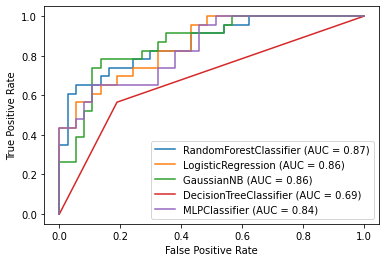

In [83]:
g = plot_roc_curve(final_random_model, X = X_test_prepared, y = y_test);
plot_roc_curve(final_log_model, X = X_test_prepared, y = y_test, ax=g.ax_);
plot_roc_curve(gau_model, X = X_test_prepared, y = y_test, ax=g.ax_);
plot_roc_curve(dec_model, X = X_test_prepared, y = y_test, ax=g.ax_);
plot_roc_curve(final_mlp_model, X = X_test_prepared, y = y_test, ax=g.ax_);

In [84]:
accuracy_score(y_test, final_predictions)

0.8333333333333334

In [85]:
final_model = final_log_model

X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
accuracy_score(y_test, final_predictions)

0.7833333333333333

In [87]:
final_model = final_mlp_model

X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_test, final_predictions)

0.75